In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import lightgbm as lgb
root = "../"
sys.path.insert(0,root + "src/")
pd.set_option('display.max_columns', 50)

from loader import Loader

## Utils

In [2]:
def evaluate(feat, plot = True):
    # cross-validate
    data = lgb.Dataset(X[feat],y,free_raw_data=False)
    scores = lgb.cv(params,data,num_boost_rounds,stratified=False)

    mape =scores['mape-mean'][-1]
    if plot:
        mae = scores['l1-mean'][-1]
        print("mape {}%,  mae {}".format(round(mape*100,2),round(mae,2)))
        plt.figure(figsize=(14,5))
        plt.subplot(1,3,1)
        plt.plot(scores['mape-mean'], label = "mape")
        plt.legend()
        plt.subplot(1,3,2)
        plt.plot(scores['l1-mean'], label = "mae")
        plt.legend()

        # feature importances
        bst = lgb.train(params,data,num_boost_rounds)
        ax = plt.subplot(1,3,3)
        lgb.plot_importance(bst,ax)
        plt.tight_layout(pad=3.0)
        plt.show()
    else:
        return mape

## load data

In [3]:
loader = Loader(root, alpha = .05)
X = loader.X
y = loader.y.values

X['annoedu'] = 2016 - X['annoedu']
X['eta_lavoro_corrente'] = 2016 - X['eta_lavoro_corrente']

median_mape = np.abs((y - np.median(y)) / y).mean()
print("mape median prediction: {}%".format(round(100*median_mape,2)))

mape median prediction: 26.68%


In [4]:
# ------------ PARAMETERS ------------
params = dict(
    objective="mape",
    metrics = ["l1","mape"], 
    learning_rate = 1e-1,
    reg_sqrt = False,
    min_data_in_leaf = 50,
)
num_boost_rounds=200

## evaluate different groups of features

mape 15.3%,  mae 2672.4


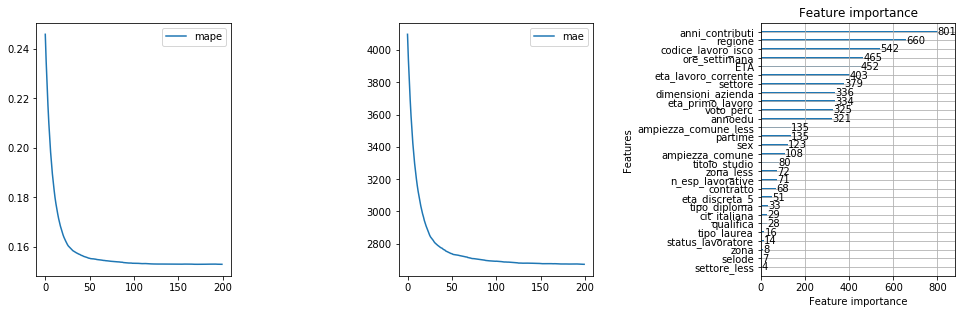

In [5]:
feat = X.columns
evaluate(feat)

mape 15.66%,  mae 2733.75


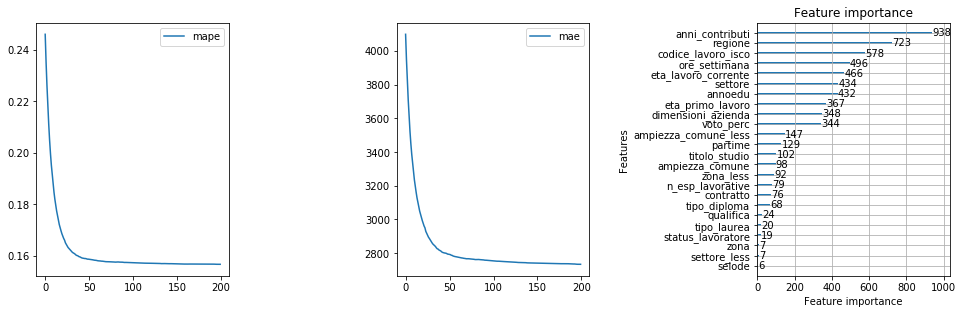

In [6]:
discard = ["cit_italiana",
           "sex",
           "ETA",
           "eta_discreta_5",
          ]
feat = [v for v in X.columns if v not in discard]
evaluate(feat)

mape 15.72%,  mae 2748.78


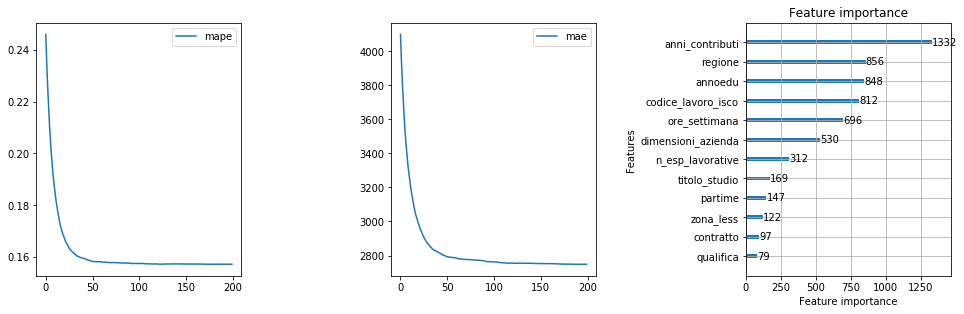

In [7]:
feat = ['partime',
     'contratto',
     'dimensioni_azienda',
     'ore_settimana',
     'titolo_studio',
     'annoedu',
     'qualifica',
     'regione',
     'codice_lavoro_isco',
     'zona_less',
     'n_esp_lavorative',
     'anni_contributi']
evaluate(feat)

In [1]:
# da https://countryeconomy.com/labour/average-wage/italy : 35378 / 33892
mult_factor = 1.043845155198867

1.043845155198867